# Lab 7: Event Selection Optimization

In [330]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

plt.rcParams["figure.figsize"] = (20,15)

# open the file of interest, and use pickle loading
file1 = open ("../higgs_100000_pt_1000_1200.pkl",'rb')
higgs_data = pickle.load(file1)

# background dataset
file2 = open ("../qcd_100000_pt_1000_1200.pkl",'rb')
qcd_data = pickle.load(file2)

In each pT sample we have, there are dedicated training samples for event selection optimization. All studies should be carried out by normalizing Higg and QCD samples in each pT sample to give expected yields accordingly. 

### 1) Make a stacked histogram plot for the feature variable: mass

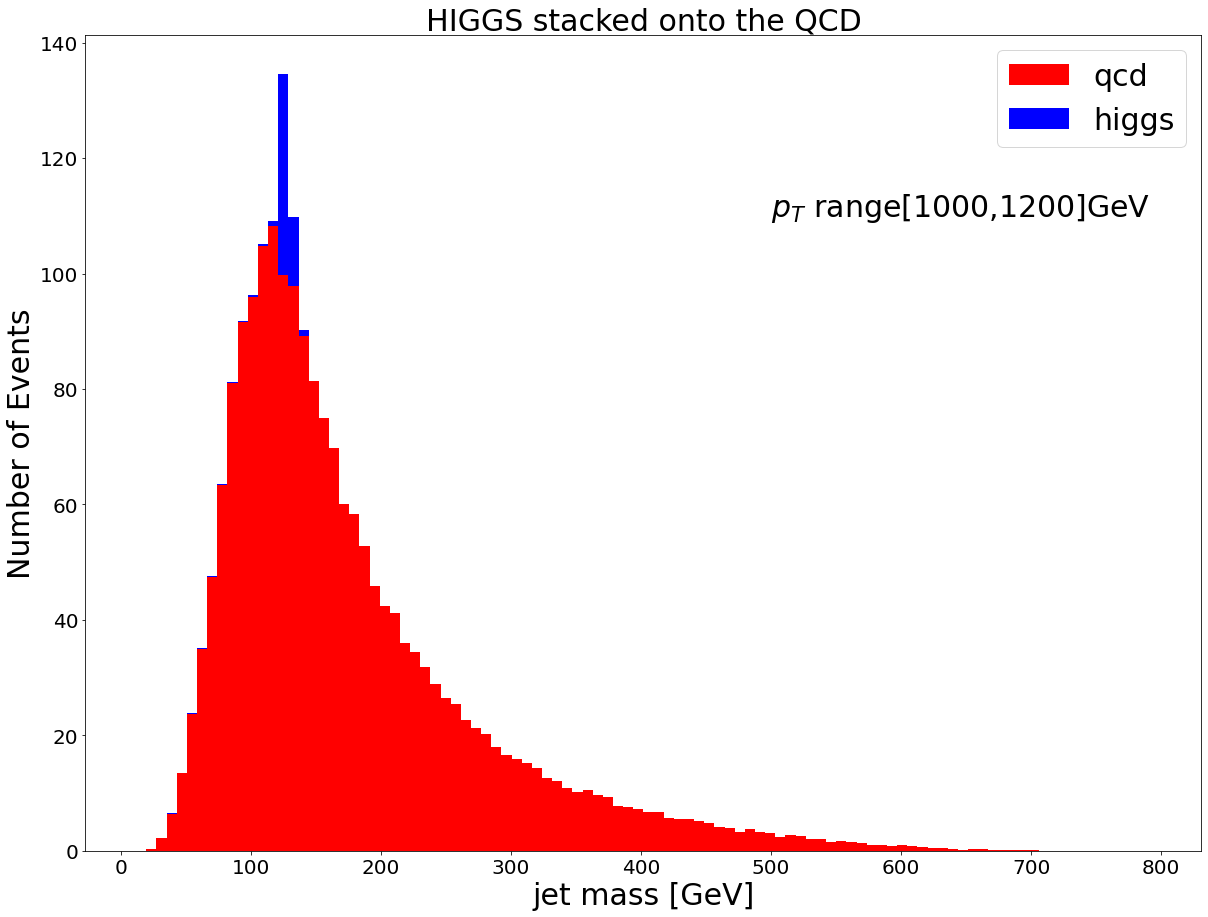

In [331]:
both_mass = [qcd_data['mass'], higgs_data['mass']]
colors = ['red','blue']
weight_higgs = np.array([50/100000]*len(higgs_data))
weight_qcd = np.array([2000/100000]*len(qcd_data))
weights = [weight_qcd,weight_higgs]
plt.hist(both_mass,stacked=True,weights=weights,color=colors,bins=100,label=['qcd', 'higgs'])


plt.tick_params(axis='both', labelsize=20)
plt.xlabel('jet mass [GeV]',size=30)
plt.ylabel('Number of Events',size=30)
plt.legend(loc="upper right",fontsize=30)
plt.text(500,110,'$p_{T}$ range[1000,1200]GeV',size=30)
plt.title('HIGGS stacked onto the QCD',size=30)
plt.show()

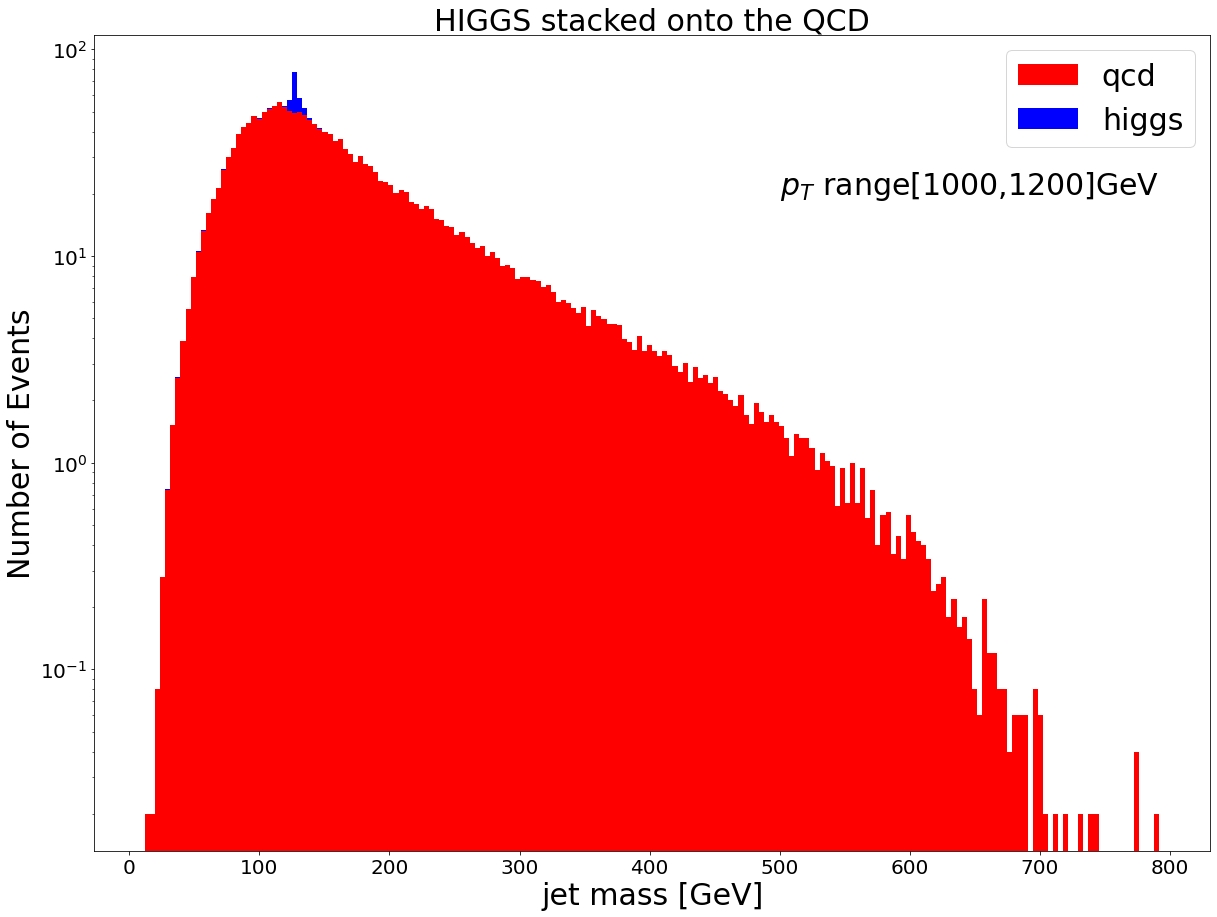

In [332]:
both_mass = [qcd_data['mass'], higgs_data['mass']]
colors = ['red','blue']
weight_higgs = np.array([50/100000]*len(higgs_data))
weight_qcd = np.array([2000/100000]*len(qcd_data))
weights = [weight_qcd,weight_higgs]
plt.hist(both_mass,stacked=True,weights=weights,color=colors,bins=200,label=['qcd', 'higgs'])


plt.tick_params(axis='both', labelsize=20)
plt.xlabel('jet mass [GeV]',size=30)
plt.ylabel('Number of Events',size=30)
plt.legend(loc="upper right",fontsize=30)
plt.text(500,20,'$p_{T}$ range[1000,1200]GeV',size=30)
plt.title('HIGGS stacked onto the QCD',size=30)
plt.yscale('log') 
plt.show()

Now we'll use Poisson statistics for significant calculation

In [333]:
N_higgs = 50; N_qcd = 2000; N_both = N_higgs+N_qcd
exact_significance=stats.norm.ppf(stats.poisson.cdf(N_both,N_qcd))
print('Exact Significance: '+ str(exact_significance))

approx = N_higgs/np.sqrt(N_qcd)
difference = exact_significance - approx;
print('Approximated Significance: ' + str(approx))

print('|Difference|: ' + str(abs(difference)) )



Exact Significance: 1.1282230087754428
Approximated Significance: 1.118033988749895
|Difference|: 0.01018902002554789


Comparing the exact significance and the approximation, we see that there is a slight different. Negliiblie I'd say.

### 2) Identifying mass cuts to optimize the expected significance

Here's there steps we must take: First we try systematically making different mass cuts, we then evaluate the expected significance for each set of mass cuts, and finally we identify the set of mass cuts which give the highest signifigance.

To start making the cut, we can start simply by looking at the plot above and choose values in the region where the peak of the signal happpens. We then change these values systematically and calculate the expected significance each to to find the optimal cut.

In [334]:
signal_peak = higgs_data['mass'].max()

In [335]:
# cut 1
def make_cut(min, max):
    signal_filter = (higgs_data['mass'] > min) & (higgs_data['mass'] < max)
    signal_cut = higgs_data[signal_filter]

    bkg_filter = (qcd_data['mass'] > min) & (qcd_data['mass'] < max)
    bkg_cut = qcd_data[bkg_filter]

    signal = N_higgs * len(signal_cut)/len(higgs_data)
    bkg = N_qcd * len(bkg_cut)/len(qcd_data)

    N_higgs_new = signal
    N_qcd_new = bkg
    N_both_new =  N_higgs_new + N_qcd_new
    
    return stats.norm.ppf(stats.poisson.cdf(N_both_new, N_qcd_new))

In [336]:
print('Expected Significance: ' + str(make_cut(80,signal_peak)))
print('Expected Significance: ' + str(make_cut(90,signal_peak)))
print('Expected Significance: ' + str(make_cut(100,signal_peak)))
print('Expected Significance: '+ str(make_cut(115,signal_peak)))
print('Expected Significance: '+ str(make_cut(120,signal_peak)))
print('Expected Significance: '+ str(make_cut(125,signal_peak)))
print('Expected Significance: '+ str(make_cut(124,signal_peak)))
print('Expected Significance: '+ str(make_cut(123,signal_peak)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-1)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-2)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-3)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-4)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-5)))

# test
print('Expected Significance: '+ str(make_cut(124,signal_peak+5)))

# back to it
print('Expected Significance: '+ str(make_cut(124,signal_peak-20)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-19)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-21)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-22)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-23)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-24)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-30)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-25)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-26)))
print(signal_peak-25)
print('Expected Significance: '+ str(make_cut(124,129.6)))
print('Expected Significance: '+ str(make_cut(124,130)))

Expected Significance: 1.6461316265902142
Expected Significance: 1.7523010795094742
Expected Significance: 1.892512936298203
Expected Significance: 2.175060717424869
Expected Significance: 2.347955380461454
Expected Significance: 2.3334963764638164
Expected Significance: 2.459196270747121
Expected Significance: 2.4457413483702948
Expected Significance: 2.486643390782473
Expected Significance: 2.505268089932995
Expected Significance: 2.5761209466376727
Expected Significance: 2.585449873042154
Expected Significance: 2.6517563595070146
Expected Significance: 2.2986276909550294
Expected Significance: 3.672216318045824
Expected Significance: 3.547725019826
Expected Significance: 3.724834800042897
Expected Significance: 3.8162688076724587
Expected Significance: 3.8463038964098653
Expected Significance: 3.912972906694857
Expected Significance: 0.22691642234940088
Expected Significance: 4.013279067577894
Expected Significance: 3.8983727699634287
129.6136749993263
Expected Significance: 3.92792

Looking at the results above, we see that in the region of mass between 124 and the (signal_peak - 25) gives the us the highest expected significance. Let's round and say between 124 and 130

In [337]:
def make_cut2(min, max):
    signal_filter = (higgs_data['mass'] > min) & (higgs_data['mass'] < max)
    signal_cut = higgs_data[signal_filter]

    bkg_filter = (qcd_data['mass'] > min) & (qcd_data['mass'] < max)
    bkg_cut = qcd_data[bkg_filter]
    
    return [signal_cut, bkg_cut]

data_cut = make_cut2(124, 130)
print('A cut of mass between 124 and 130 gives us the highest expected significance: ' + str(make_cut(124,130)))

A cut of mass between 124 and 130 gives us the highest expected significance: 3.993622369521206


### 3) Stacked histogram plots for the rest of the features

We will now make stacked histogram plots for the rest of the features. We'll have two sets, one without any event selection. Another with the optimal mass cuts. [weighted]

In [338]:
def make_stack(feature,xlabel):
    both = [qcd_data[feature], higgs_data[feature]]
    colors = ['red','blue']
    weight_higgs = np.array([50/100000]*len(higgs_data))
    weight_qcd = np.array([2000/100000]*len(qcd_data))
    weights = [weight_qcd,weight_higgs]

    fig,ax = plt.subplots(1,2,figsize=(25,10))
    ax[0].set_title(feature +  ' prior to mass cut',size=40/2)
    ax[0].hist(both,stacked=True,weights=weights,color=colors,bins=200,label=['qcd', 'higgs'])
    ax[0].set_ylabel('Number of Events',size=30/2)
    ax[0].set_xlabel(xlabel,size=30/2)
    ax[0].legend(loc="upper right",fontsize=30/2)
    ax[0].semilogy()
    
    both_cut = [data_cut[1][feature], data_cut[0][feature]]
    weight_higgs_cut = np.array([50/100000]*len(data_cut[0]))
    weight_qcd_cut = np.array([2000/100000]*len(data_cut[1]))
    weights_cut = [weight_qcd_cut,weight_higgs_cut]

    ax[1].set_title(feature +  ' after mass cut',size=40/2)
    ax[1].hist(both_cut,stacked=True,weights=weights_cut,color=colors,bins=200,label=['qcd', 'higgs'])
    ax[1].set_ylabel('Number of Events',size=30/2)
    ax[1].set_xlabel(xlabel,size=30/2)
    ax[1].legend(loc="upper right",fontsize=30/2)
    ax[1].semilogy()
    

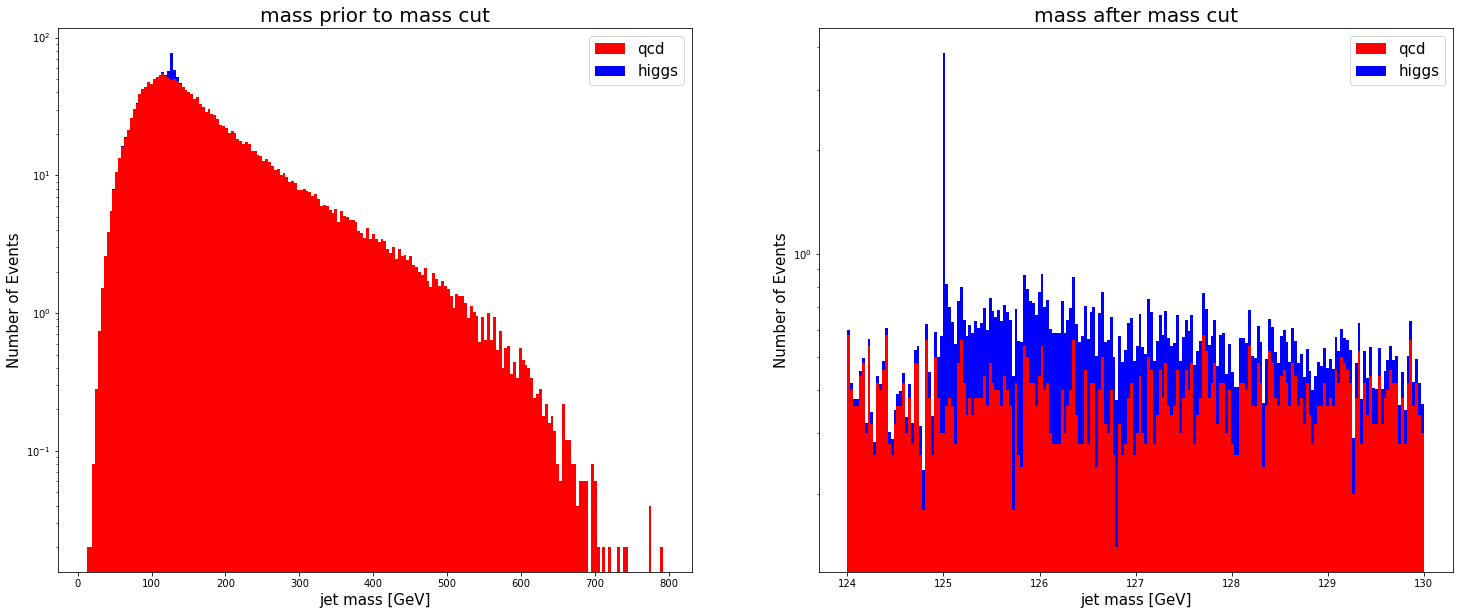

In [339]:
make_stack('mass','jet mass [GeV]')

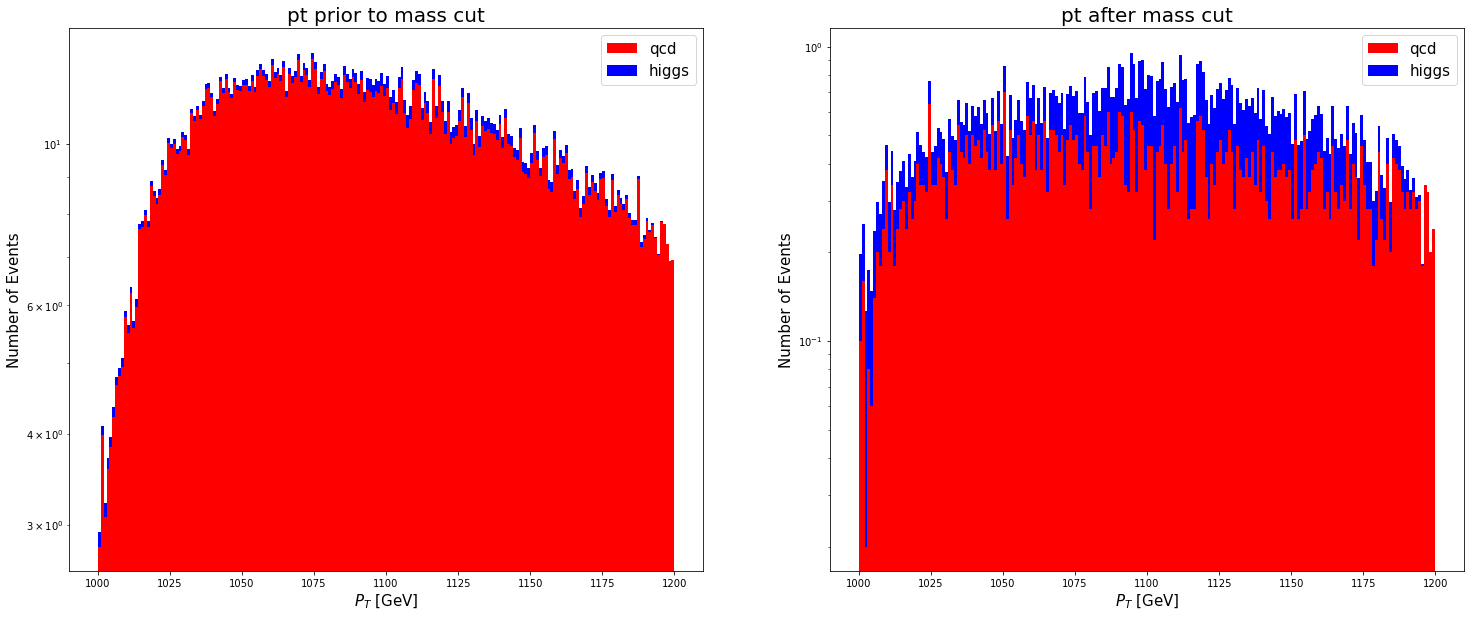

In [340]:
make_stack('pt','$P_T$ [GeV]')

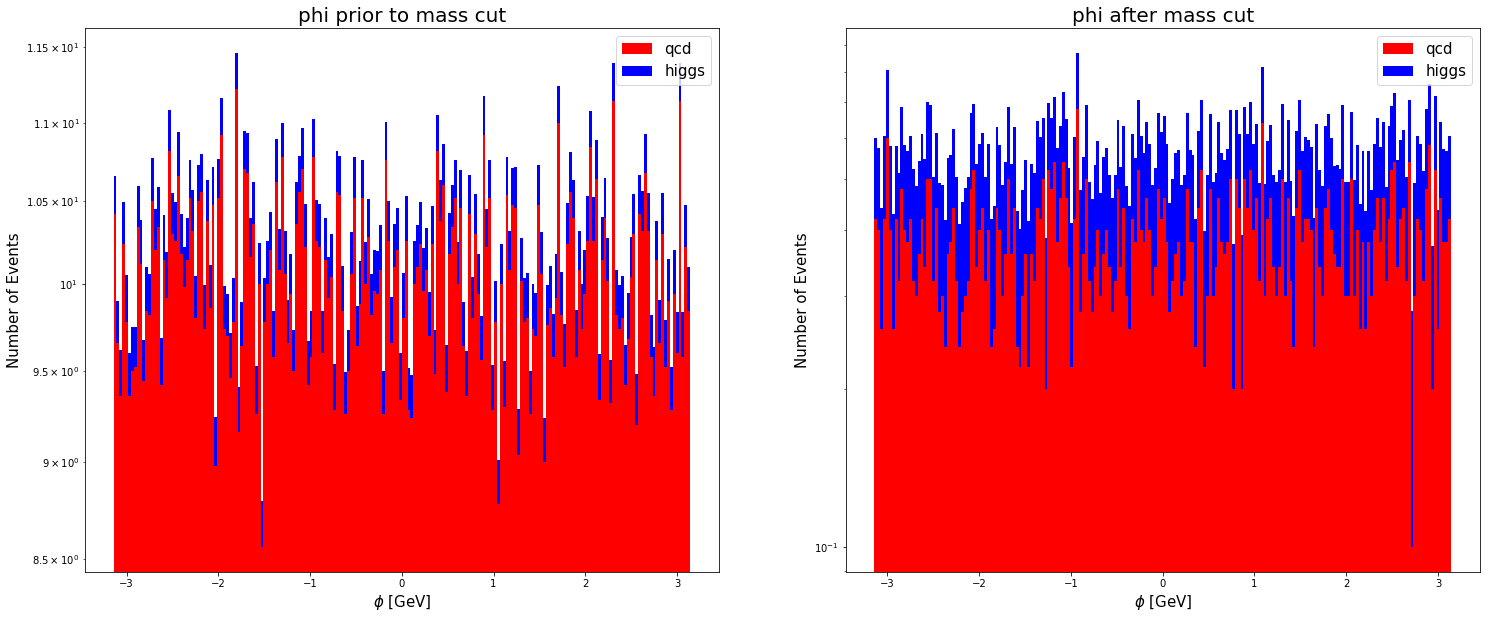

In [341]:
make_stack('phi','$\phi$ [GeV]')

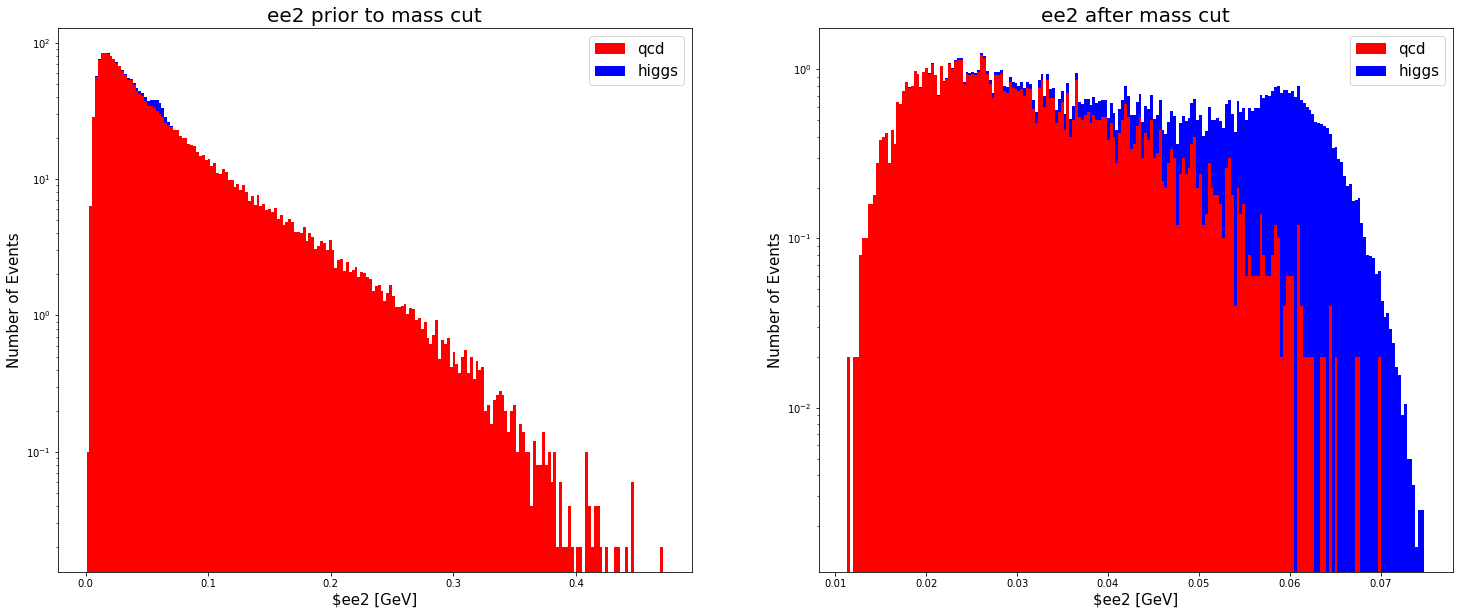

In [342]:
make_stack('ee2','$ee2 [GeV]')

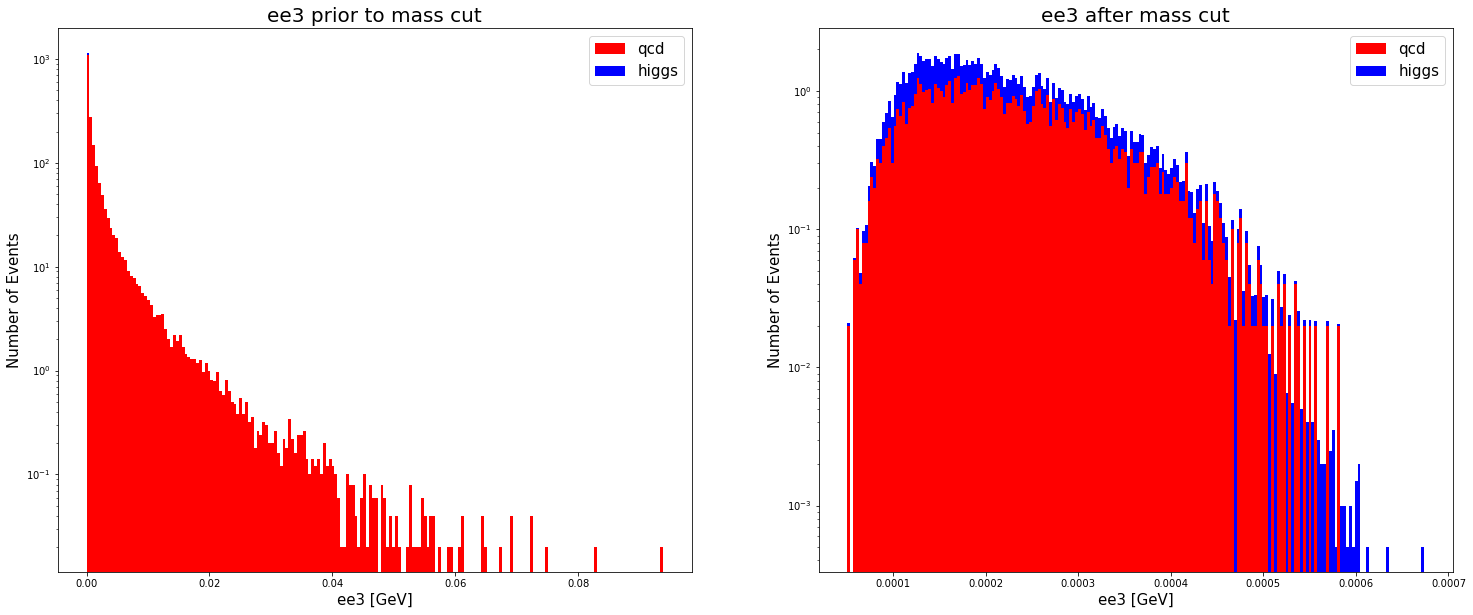

In [343]:
make_stack('ee3','ee3 [GeV]')

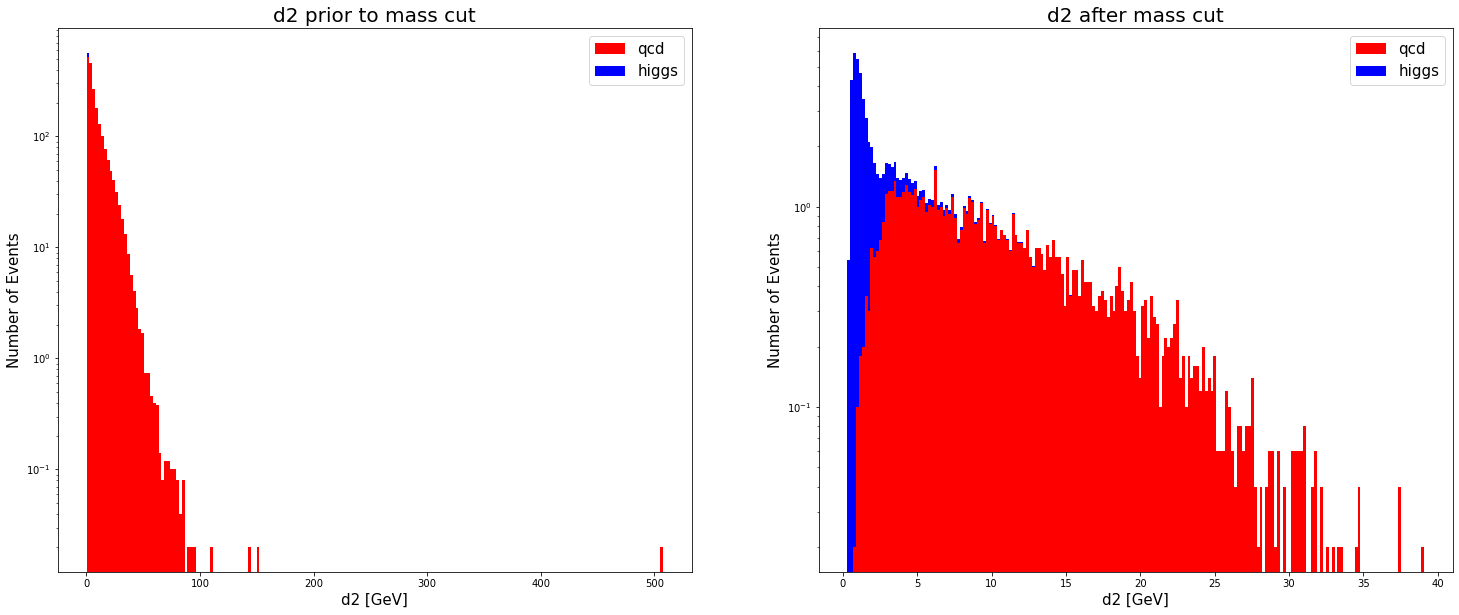

In [344]:
make_stack('d2','d2 [GeV]')

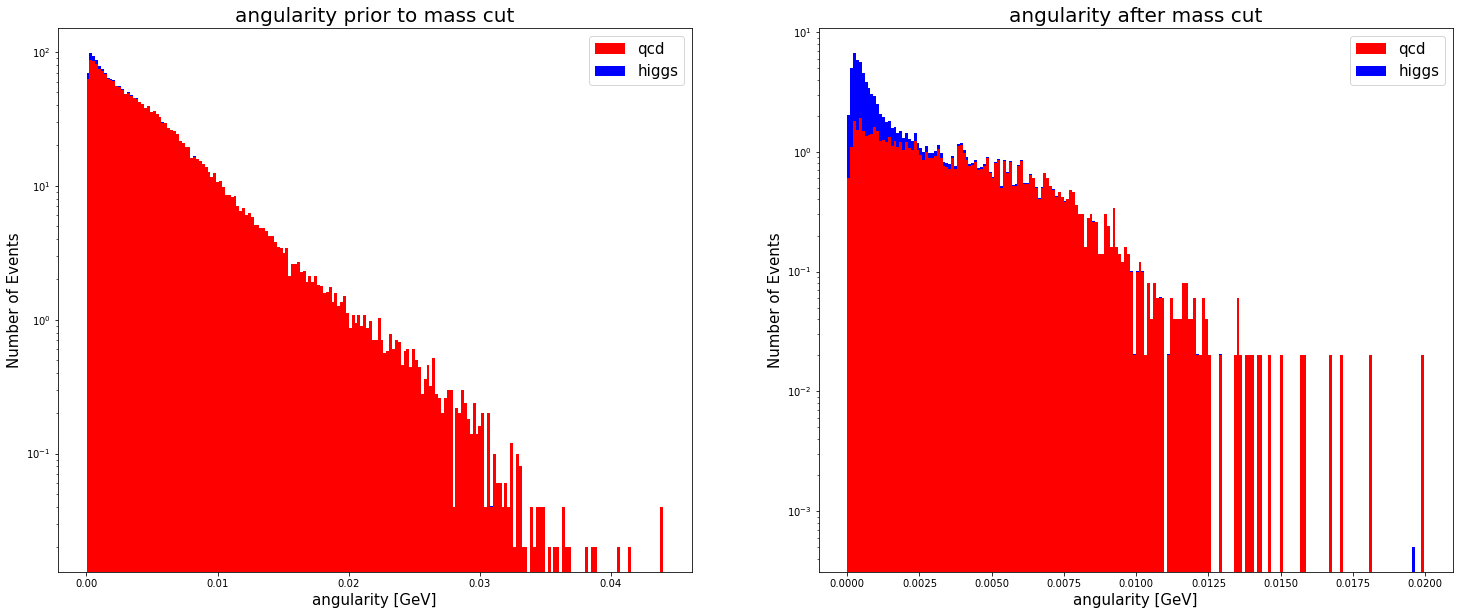

In [345]:
make_stack('angularity','angularity [GeV]')

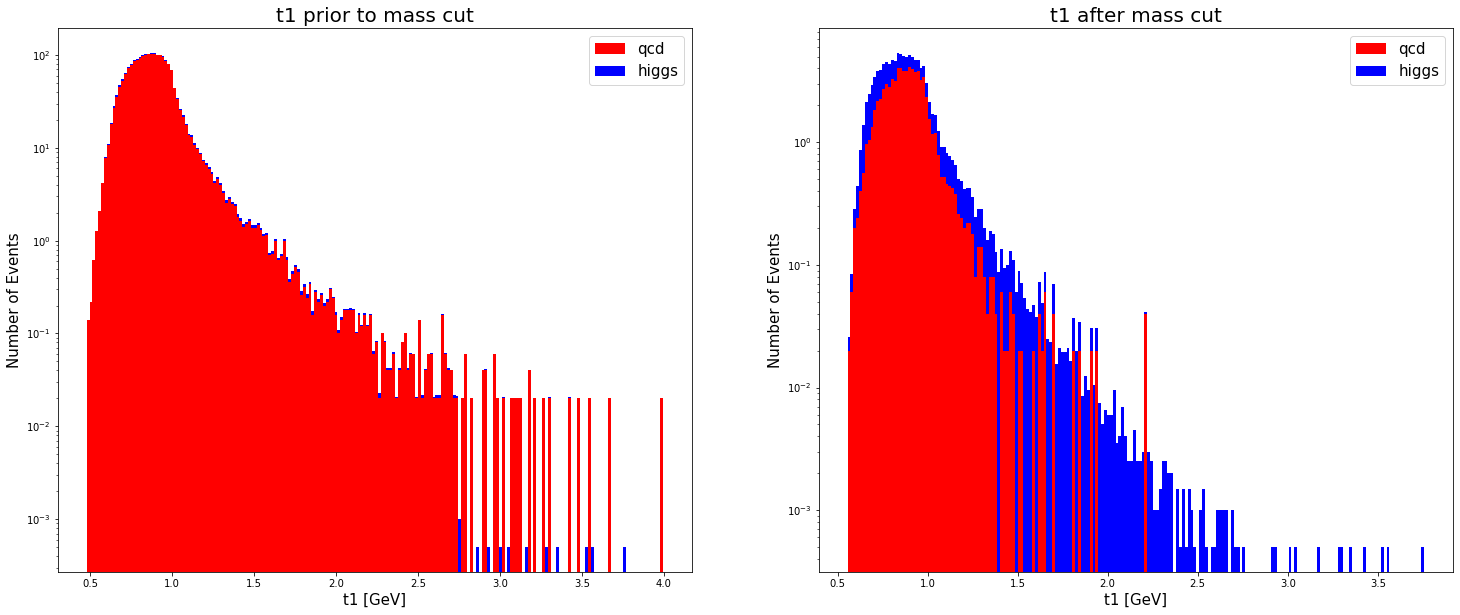

In [346]:
make_stack('t1','t1 [GeV]')

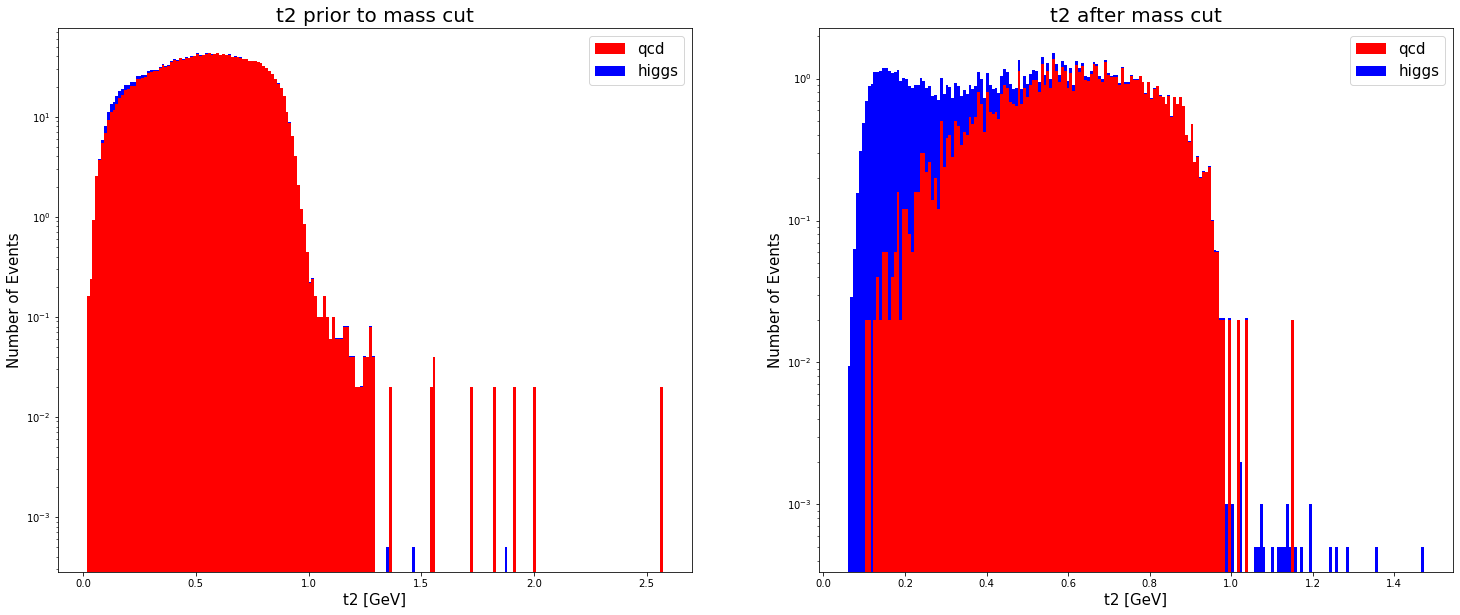

In [347]:
make_stack('t2','t2 [GeV]')

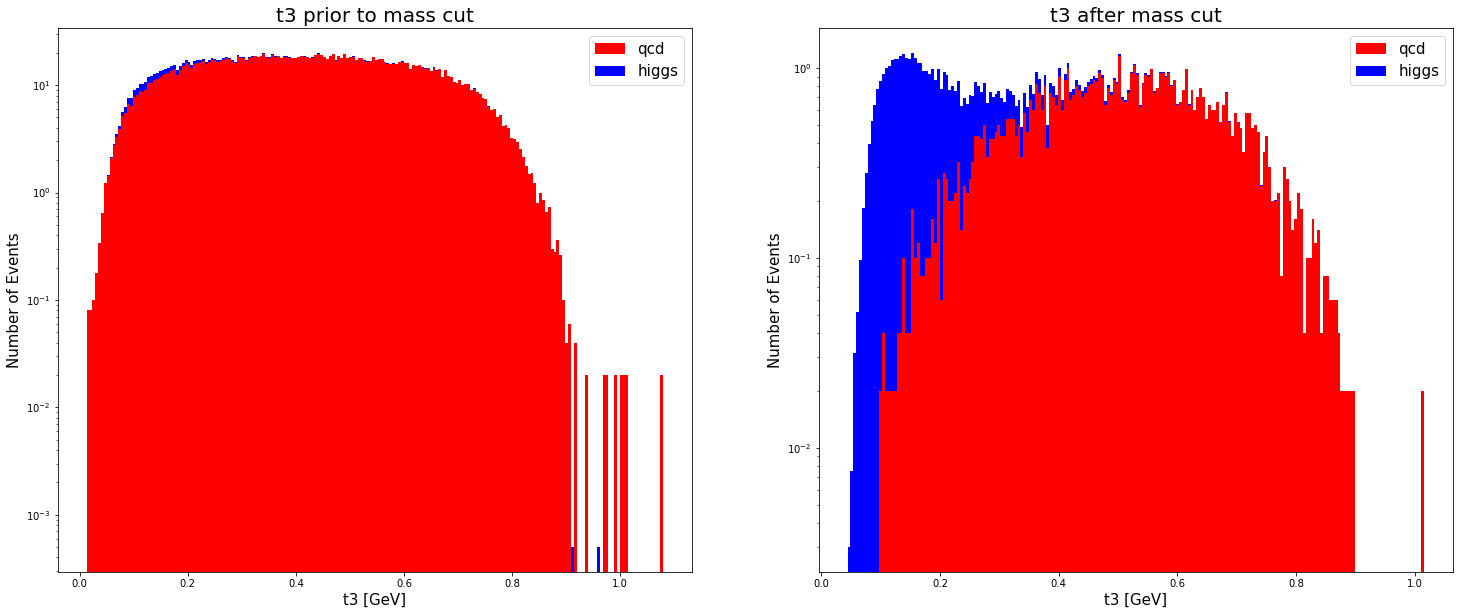

In [348]:
make_stack('t3','t3 [GeV]')

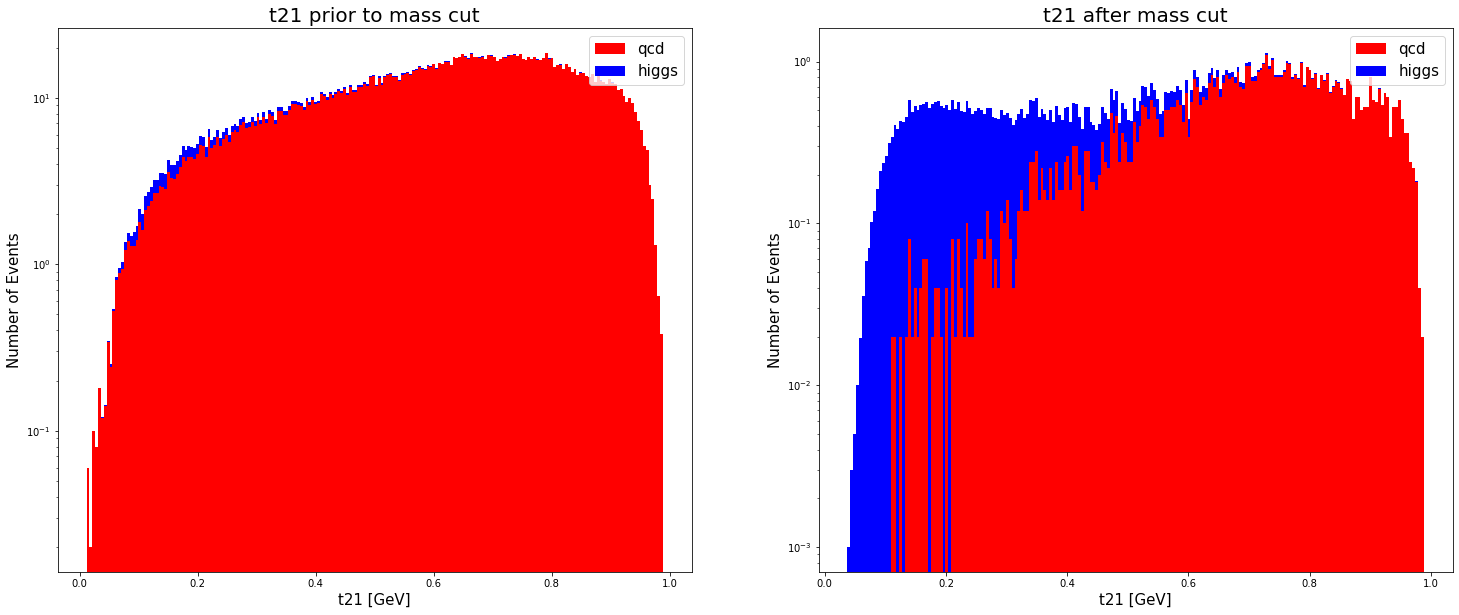

In [349]:
make_stack('t21','t21 [GeV]')

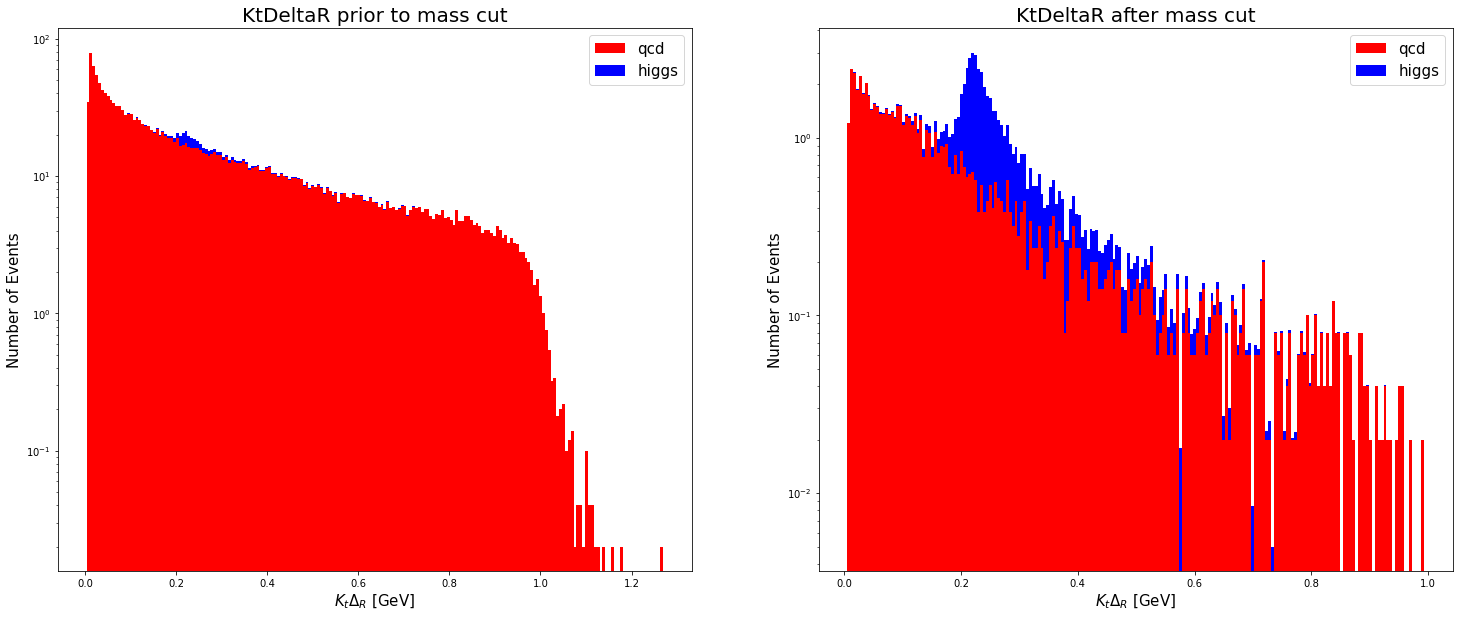

In [350]:
make_stack('KtDeltaR','$K_{t}\Delta_{R}$ [GeV]')

Let's  identify another feature to further improve your expected significance.

Looking at the plots, we can see that the features ee2, t2, t3, t21, angularity, d2, and KtDeltaR are good candidates that may allow us to futher improve the expected significance. In each one of these, we can see for the distribition prior to making the mass cuts, there are peaks for the higgs signal similar to the mass.

### 4) Optimize event selections using multiple features (if necessary)

Let's do KtDeltaR

In [351]:
sig_peak = higgs_data['KtDeltaR'].max()
def cut(min, max, feature):
    signal_filter = (higgs_data[feature] > min) & (higgs_data[feature] < max)
    signal_cut = higgs_data[signal_filter]

    bkg_filter = (qcd_data[feature] > min) & (qcd_data[feature] < max)
    bkg_cut = qcd_data[bkg_filter]

    signal = N_higgs * len(signal_cut)/len(higgs_data)
    bkg = N_qcd * len(bkg_cut)/len(qcd_data)

    N_higgs_new = signal
    N_qcd_new = bkg
    N_both_new =  N_higgs_new + N_qcd_new
    
    return stats.norm.ppf(stats.poisson.cdf(N_both_new, N_qcd_new))

In [352]:
print('Expected Significance: '+ str(cut(0.2,sig_peak,'KtDeltaR')))
print('Expected Significance: '+ str(cut(0.3,sig_peak,'KtDeltaR')))
print('Expected Significance: '+ str(cut(0.1,sig_peak,'KtDeltaR')))
print('Expected Significance: '+ str(cut(0.1705,sig_peak,'KtDeltaR')))
print('Expected Significance: '+ str(cut(0.1705,sig_peak+0.002,'KtDeltaR')))
print('Expected Significance: '+ str(cut(0.1705,sig_peak-0.004,'KtDeltaR')))
print('Expected Significance: '+ str(cut(0.1705,sig_peak-0.104,'KtDeltaR')))
print('Expected Significance: '+ str(cut(0.1705,sig_peak-0.2,'KtDeltaR')))
print('Expected Significance: '+ str(cut(0.1705,sig_peak-0.5,'KtDeltaR')))
print('Expected Significance: '+ str(cut(0.1705,sig_peak-0.7,'KtDeltaR')))
print('Expected Significance: '+ str(cut(0.2,sig_peak-0.7,'KtDeltaR')))

Expected Significance: 1.3532246263342196
Expected Significance: 0.4119339703894579
Expected Significance: 1.3249391956184888
Expected Significance: 1.4103569600346517
Expected Significance: 1.4060579651607386
Expected Significance: 1.4116360239636387
Expected Significance: 1.429871798367456
Expected Significance: 1.4879232368402775
Expected Significance: 1.738016944612413
Expected Significance: 1.7998538200593397
Expected Significance: 1.988662610287816


Well, looks like the best we can do with KtDeltaR is 1.988

Let's try KtDeltaR with the mass cut first

In [353]:
sig_peak1 = data_cut[0]['KtDeltaR'].max()
def cut_w_cut(min, max, feature):
    signal_filter = (data_cut[0][feature] > min) & (data_cut[0][feature] < max)
    signal_cut = data_cut[0][signal_filter]

    bkg_filter = (data_cut[1][feature] > min) & (data_cut[1][feature] < max)
    bkg_cut = data_cut[1][bkg_filter]

    signal = N_higgs * len(signal_cut)/len(data_cut[0])
    bkg = N_qcd * len(bkg_cut)/len(data_cut[1])

    N_higgs_new = signal
    N_qcd_new = bkg
    N_both_new =  N_higgs_new + N_qcd_new
    
    return stats.norm.ppf(stats.poisson.cdf(N_both_new, N_qcd_new))

In [354]:
print('Expected Significance: '+ str(cut_w_cut(0.2,sig_peak1,'KtDeltaR')))
print('Expected Significance: '+ str(cut_w_cut(0.3,sig_peak1,'KtDeltaR')))
print('Expected Significance: '+ str(cut_w_cut(0.1,sig_peak1,'KtDeltaR')))
print('Expected Significance: '+ str(cut_w_cut(0.1705,sig_peak1,'KtDeltaR')))
print('Expected Significance: '+ str(cut_w_cut(0.1705,sig_peak1+0.002,'KtDeltaR')))
print('Expected Significance: '+ str(cut_w_cut(0.1705,sig_peak1-0.004,'KtDeltaR')))
print('Expected Significance: '+ str(cut_w_cut(0.1705,sig_peak1-0.104,'KtDeltaR')))
print('Expected Significance: '+ str(cut_w_cut(0.1705,sig_peak1-0.2,'KtDeltaR')))
print('Expected Significance: '+ str(cut_w_cut(0.1705,sig_peak1-0.5,'KtDeltaR')))
print('Expected Significance: '+ str(cut_w_cut(0.1705,sig_peak1-0.7,'KtDeltaR')))
print('Expected Significance: '+ str(cut_w_cut(0.2,sig_peak1-0.7,'KtDeltaR')))

Expected Significance: 1.6999502679395309
Expected Significance: 0.5201235805260935
Expected Significance: 1.4515225438711101
Expected Significance: 1.71819153589781
Expected Significance: 1.6990632719673875
Expected Significance: 1.7019473500551883
Expected Significance: 1.7560869871219755
Expected Significance: 1.7654045848559736
Expected Significance: 1.9211180324944033
Expected Significance: 1.101458489594174
Expected Significance: 1.329806272045132


Hmmm. that's not good. I guess we try a different one. Let's do ee2

In [355]:
sig_peak_ee2 = data_cut[0]['ee2'].max()

In [356]:
print('Expected Significance: '+ str(cut_w_cut(0,sig_peak_ee2,'ee2')))
print('Expected Significance: '+ str(cut_w_cut(1,sig_peak_ee2,'ee2')))
print('Expected Significance: '+ str(cut_w_cut(0.1,sig_peak_ee2,'ee2')))
print('Expected Significance: '+ str(cut_w_cut(0.01,sig_peak_ee2,'ee2')))
print('Expected Significance: '+ str(cut_w_cut(0.055,sig_peak_ee2,'ee2')))
print('Expected Significance: '+ str(cut_w_cut(0.055,sig_peak_ee2+0.001,'ee2')))
print('Expected Significance: '+ str(cut_w_cut(0.055,0.076,'ee2')))

Expected Significance: 1.1060461130390684
Expected Significance: inf
Expected Significance: inf
Expected Significance: 1.1060461130390684
Expected Significance: 3.937121053549406
Expected Significance: 3.937121053549406
Expected Significance: 3.937121053549406


Oh yay, for ee2, we get an expected significant of 3.94 for ee2 cuts between 0.055 and 0.076.(This result is after we've applied the mass cut, let's try without the mass cut first)

In [357]:
sig_peak_ee2_2 = higgs_data['ee2'].max()
print('Expected Significance: '+ str(cut(0,sig_peak_ee2_2,'ee2')))
print('Expected Significance: '+ str(cut(1,sig_peak_ee2_2,'ee2')))
print('Expected Significance: '+ str(cut(0.1,sig_peak_ee2_2,'ee2')))
print('Expected Significance: '+ str(cut(0.01,sig_peak_ee2_2,'ee2')))
print('Expected Significance: '+ str(cut(0.055,sig_peak_ee2_2,'ee2')))
print('Expected Significance: '+ str(cut(0.055,sig_peak_ee2_2+0.001,'ee2')))
print('Expected Significance: '+ str(cut(0.055,0.076,'ee2')))

Expected Significance: 1.2959297029579298
Expected Significance: inf
Expected Significance: inf
Expected Significance: 1.335064273626161
Expected Significance: 1.6814916937373754
Expected Significance: 1.6727786915932121
Expected Significance: 1.6607181515602745


Not as good.

We can keep doing this for the other canidates and eventually we'll get to a point where all is optimized and we get better expected significance. For example after making cuts mass cut, t21 and t2 have clear differences in background and signal, a combination of these would give us better results as well.